In [138]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [139]:
prostate_cancer_df = pd.read_csv('./prostate_cancer.csv', sep=',')
print("Số chiều của bộ dữ liệu: ", prostate_cancer_df.shape)
print(prostate_cancer_df)

Số chiều của bộ dữ liệu:  (97, 9)
      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
..       ...       ...  ...       ...  ...       ...      ...    ...       ...
92  2.830268  3.876396   68 -1.386294    1  1.321756        7     60  4.385147
93  3.821004  3.896909   44 -1.386294    1  2.169054        7     40  4.684443
94  2.907447  3.396185   52 -1.386294    1  2.463853        7     10  5.143124
95  2.882564  3.773910   68  1.558145    1  1.558145        7     80  5.477509
96  3.471966  3.974998   68  0.438255    1  2.904165        7     20  5.582932

[97 rows x 9 colu

In [140]:
prostate_cancer_df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [141]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

def scale_columns(df, cols):
    for col in cols:
        df[col] = pd.DataFrame(mms.fit_transform(pd.DataFrame(df[col])), columns=[col])
    return df

prostate_cancer_scaled = scale_columns(prostate_cancer_df, [prostate_cancer_df.columns[2]])
prostate_cancer_arr = prostate_cancer_scaled.to_numpy()

In [142]:
prostate_cancer_train = {
    'data': prostate_cancer_arr[:67, :-1],
    'target': prostate_cancer_arr[:67, -1]
}

prostate_cancer_test = {
    'data': prostate_cancer_arr[67:, :-1],
    'target': prostate_cancer_arr[67:, -1]
}

In [143]:
linear_regr = linear_model.LinearRegression()
linear_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
print("[w1, w2,..., wn] = ", linear_regr.coef_)
print("w0 = ", linear_regr.intercept_)

[w1, w2,..., wn] =  [ 0.43781781  0.57463133 -0.96486058  0.15850887 -0.30144711 -0.1077378
  0.24364124  0.00309586]
w0 =  -1.6998065617549987


In [144]:
prostate_cancer_test_target_predicted = linear_regr.predict(prostate_cancer_test['data'])
rmse = math.sqrt(mean_squared_error(prostate_cancer_test['target'], prostate_cancer_test_target_predicted))
print(f'RMSE = {rmse}')

RMSE = 1.4846333766283948


In [145]:
alpha_list = [x / 2 for x in list(range(30))]

In [146]:
weight_list_by_alpha = []
for alpha in tqdm(alpha_list):
    ridge_reger = linear_model.Ridge(alpha=alpha)
    ridge_reger.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
    weight_list_by_alpha.append([ridge_reger.intercept_] + list(ridge_reger.coef_))
weight_data = np.array(weight_list_by_alpha)


100%|██████████| 30/30 [00:00<00:00, 1070.77it/s]


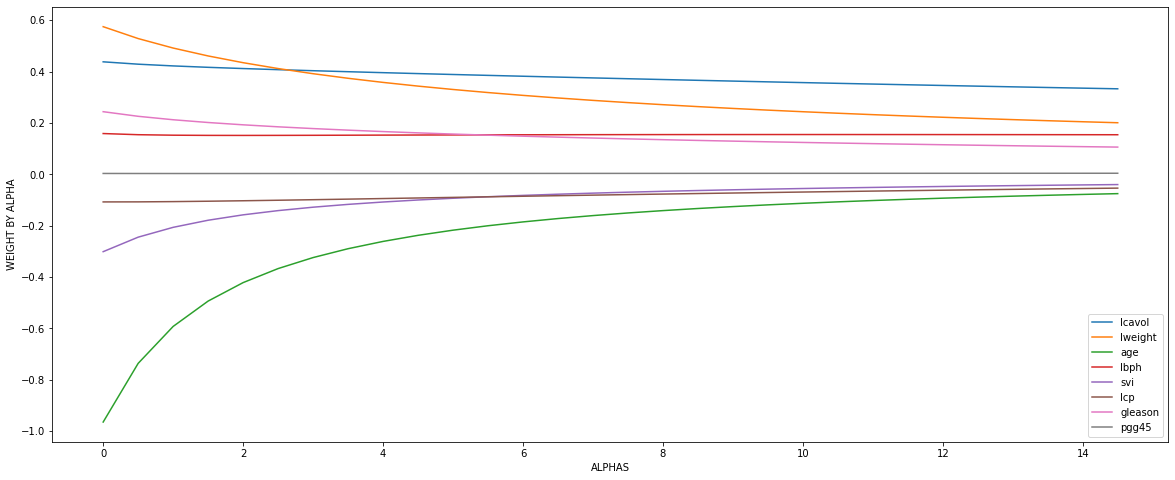

In [147]:
plt.figure(figsize=(20, 8))
plt.xlabel("ALPHAS")
plt.ylabel("WEIGHT BY ALPHA")
for i in range(1, weight_data.shape[1]):
    plt.plot(alpha_list, weight_data[:, i])
plt.legend(list(prostate_cancer_df.columns)[:-1], loc='best')    
plt.show()

100%|██████████| 30/30 [00:00<00:00, 352.96it/s]


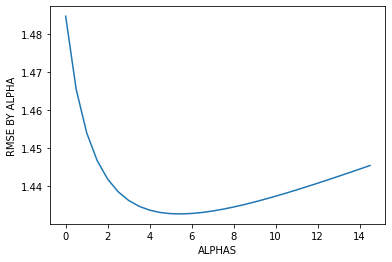

In [148]:
rmse_by_alpha = []
for alpha in tqdm(alpha_list):
    ridge_reger = linear_model.Ridge(alpha=alpha)
    ridge_reger.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
    prostate_cancer_test_target_predicted = ridge_reger.predict(prostate_cancer_test['data'])
    rmse = math.sqrt(mean_squared_error(prostate_cancer_test['target'], prostate_cancer_test_target_predicted))
    rmse_by_alpha.append(rmse)

plt.xlabel("ALPHAS")
plt.ylabel("RMSE BY ALPHA")
plt.plot(alpha_list, rmse_by_alpha)
plt.show()

In [149]:
ridge_reger = linear_model.Ridge(alpha=5)
ridge_reger.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
print("[w1, w2,..., wn] = ", ridge_reger.coef_)
print("w0 = ", ridge_reger.intercept_)

[w1, w2,..., wn] =  [ 0.388475    0.33012034 -0.21776869  0.15313623 -0.09345342 -0.09010693
  0.15651654  0.00316383]
w0 =  -0.6433202760629273


In [150]:
prostate_cancer_test_target_predicted = ridge_reger.predict(prostate_cancer_test['data'])
rmse = math.sqrt(mean_squared_error(prostate_cancer_test['target'], prostate_cancer_test_target_predicted))
print(f'RMSE = {rmse}')

RMSE = 1.4328803753886048


In [151]:
alpha_list = [x / 100 for x in list(range(0, 101, 10))]

In [152]:
weight_list_by_alpha = []
for alpha in tqdm(alpha_list):
    lasso_regr = linear_model.Lasso(alpha=alpha)
    lasso_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
    weight_list_by_alpha.append([lasso_regr.intercept_] + list(lasso_regr.coef_))
weight_data = np.array(weight_list_by_alpha)


  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\Pc\AppData\Local\Temp/ipykernel_5788/493420193.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+00, tolerance: 4.593e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the s

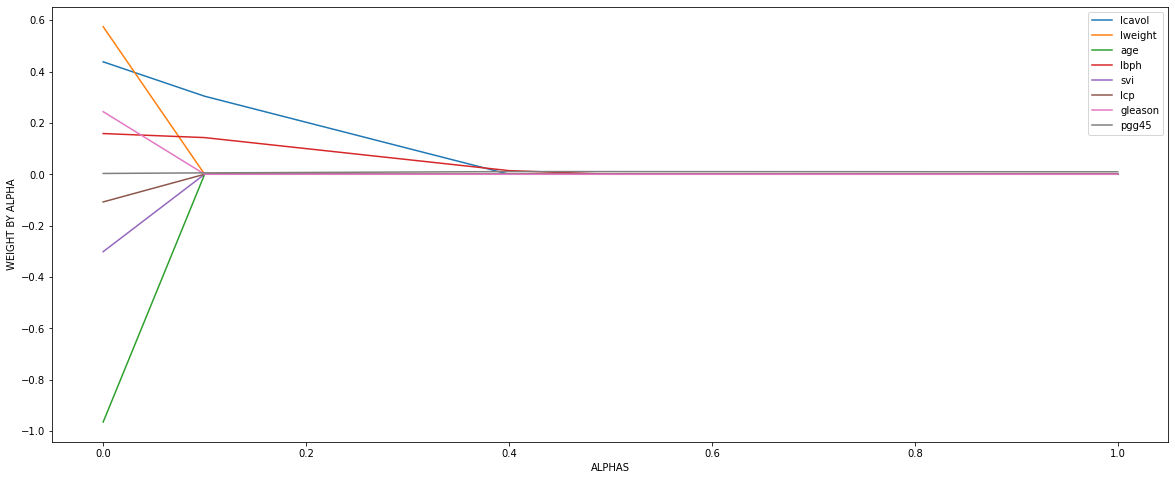

In [153]:
plt.figure(figsize=(20, 8))
plt.xlabel("ALPHAS")
plt.ylabel("WEIGHT BY ALPHA")
for i in range(1, weight_data.shape[1]):
    plt.plot(alpha_list, weight_data[:, i])
plt.legend(list(prostate_cancer_df.columns)[:-1], loc='best')    
plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\Pc\AppData\Local\Temp/ipykernel_5788/2937292369.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+00, tolerance: 4.593e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

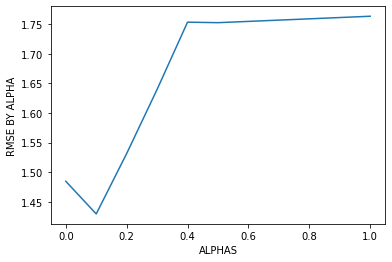

In [154]:
rmse_by_alpha = []
for alpha in tqdm(alpha_list):
    lasso_regr = linear_model.Lasso(alpha=alpha)
    lasso_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
    prostate_cancer_test_target_predicted = lasso_regr.predict(prostate_cancer_test['data'])
    rmse = math.sqrt(mean_squared_error(prostate_cancer_test['target'], prostate_cancer_test_target_predicted))
    rmse_by_alpha.append(rmse)

plt.xlabel("ALPHAS")
plt.ylabel("RMSE BY ALPHA")
plt.plot(alpha_list, rmse_by_alpha)
plt.show()

In [155]:
lasso_regr = linear_model.Lasso(alpha=0.1)
lasso_regr.fit(prostate_cancer_train['data'], prostate_cancer_train['target'])
print("[w1, w2,..., wn] = ", lasso_regr.coef_)
print("w0 = ", lasso_regr.intercept_)

[w1, w2,..., wn] =  [ 0.30384977  0.         -0.          0.14273201 -0.         -0.
  0.          0.00536446]
w0 =  1.5275680401038252


In [156]:
prostate_cancer_test_target_predicted = lasso_regr.predict(prostate_cancer_test['data'])
rmse = math.sqrt(mean_squared_error(prostate_cancer_test['target'], prostate_cancer_test_target_predicted))
print(f'RMSE = {rmse}')

RMSE = 1.429488124089856
